In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# First data frame: airbnb information

In [3]:
airbnb = pd.read_csv("listings.csv.gz")
airbnb.shape

(95461, 75)

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95461 non-null  int64  
 1   listing_url                                   95461 non-null  object 
 2   scrape_id                                     95461 non-null  int64  
 3   last_scraped                                  95461 non-null  object 
 4   source                                        95461 non-null  object 
 5   name                                          95461 non-null  object 
 6   description                                   91385 non-null  object 
 7   neighborhood_overview                         48179 non-null  object 
 8   picture_url                                   95459 non-null  object 
 9   host_id                                       95461 non-null 

In [5]:
# Dropping irrelevant columns for the analysis 
airbnb_clean = airbnb.drop(columns=["host_name","property_type", "host_identity_verified", "scrape_id", "calculated_host_listings_count", "license", "last_review", "reviews_per_month", "host_since", "picture_url", "host_url", "host_location","instant_bookable","calculated_host_listings_count_entire_homes","calculated_host_listings_count_private_rooms",	"calculated_host_listings_count_shared_rooms", "number_of_reviews_ltm",	"number_of_reviews_l30d", "first_review", "neighbourhood_group_cleansed", "host_about", "description", "last_scraped", "calendar_last_scraped", "review_scores_cleanliness","review_scores_checkin", "review_scores_location", "neighborhood_overview", "host_response_time", "host_response_rate","availability_30", "availability_60", "availability_90", "availability_365", "review_scores_communication", "review_scores_accuracy", "host_thumbnail_url", "host_picture_url","maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calendar_updated", "name", "host_listings_count", "host_total_listings_count","neighbourhood", "host_has_profile_pic", "amenities", "minimum_minimum_nights", "bathrooms_text", "review_scores_value", "host_neighbourhood", "host_verifications", "source"])

In [6]:
airbnb_clean.columns

Index(['id', 'listing_url', 'host_id', 'host_acceptance_rate',
       'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'review_scores_rating'],
      dtype='object')

In [7]:
airbnb_clean.rename(columns={"neighbourhood_cleansed":"neighbourhood"}, inplace=True)

In [8]:
airbnb_clean.isnull().sum()

id                          0
listing_url                 0
host_id                     0
host_acceptance_rate    30413
host_is_superhost        2302
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
accommodates                0
bathrooms               31239
bedrooms                 7405
beds                    31360
price                   31231
minimum_nights              0
maximum_nights              0
has_availability         4869
number_of_reviews           0
review_scores_rating    27142
dtype: int64

In [9]:
airbnb_clean.dropna(inplace=True)

In [10]:
airbnb_clean.duplicated().sum()

0

In [11]:
airbnb_clean['price'] = airbnb_clean['price'].str.replace('$', '', regex=False)
airbnb_clean['price'] = airbnb_clean['price'].str.replace(',', '', regex=False)
airbnb_clean['price'] = pd.to_numeric(airbnb_clean['price'])
airbnb_clean['host_acceptance_rate'] = airbnb_clean['host_acceptance_rate'].str.replace('%', '', regex=False)
airbnb_clean['host_acceptance_rate'] = pd.to_numeric(airbnb_clean['host_acceptance_rate'])

In [12]:
# Filtering the DF to get the best airbnbs

airbnb_clean = airbnb_clean[airbnb_clean["review_scores_rating"] >= 5]
airbnb_clean = airbnb_clean[airbnb_clean["host_acceptance_rate"] >= 99]

In [13]:
airbnb_clean.shape

(4715, 19)

Text(0.5, 1.0, 'Airbnbs in Paris')

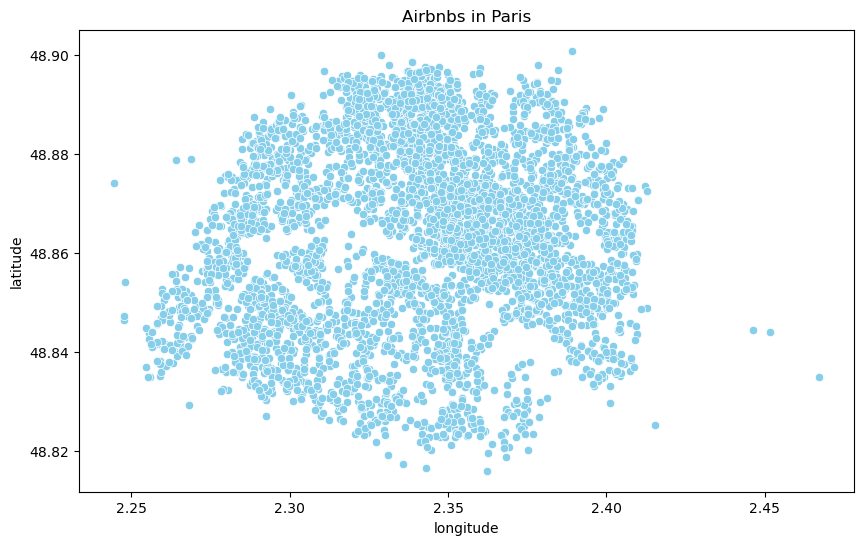

In [14]:
# Checking the airbnbs distribution across Paris
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb_clean, x="longitude", y= "latitude", c="skyblue")
plt.title("Airbnbs in Paris")

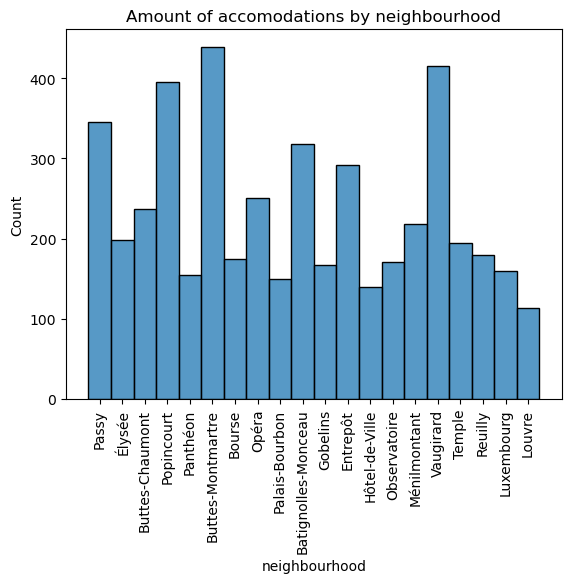

In [15]:
sns.histplot(airbnb_clean["neighbourhood"])
plt.xticks(rotation=90)
plt.title("Amount of accomodations by neighbourhood")
plt.show()

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\3351226178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airbnb_clean, x="accommodates", palette="Set2")


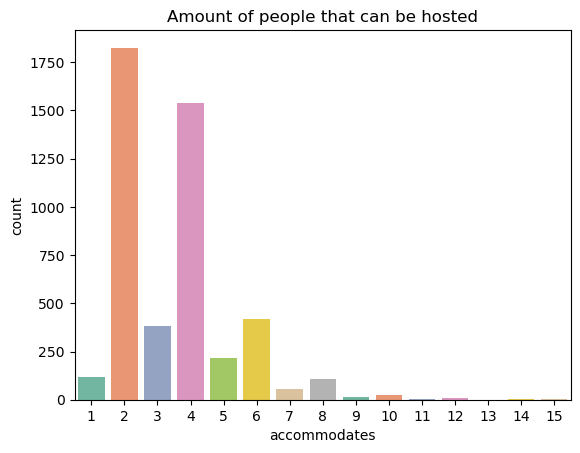

In [16]:
sns.countplot(data=airbnb_clean, x="accommodates", palette="Set2")
plt.title("Amount of people that can be hosted")
plt.show()

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\4279579100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airbnb_clean, x="price_range", palette="Set2")


<Axes: xlabel='price_range', ylabel='count'>

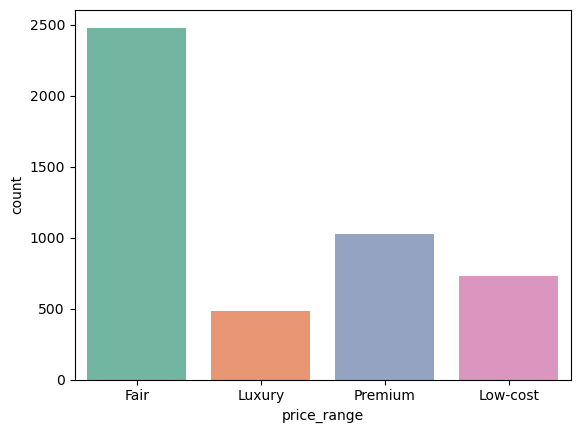

In [17]:
def price_range(row):
    if row < 100:
        return "Low-cost"
    elif row < 250:
        return "Fair"
    elif row < 500:
        return "Premium"
    else:
        return "Luxury"
    
airbnb_clean["price_range"] = airbnb_clean["price"].apply(price_range)
sns.countplot(data=airbnb_clean, x="price_range", palette="Set2")

In [18]:
# Most expensive neighbourhoods

avg_price_neighborhood = airbnb_clean.groupby("neighbourhood")["price"].mean()
avg_price_neighborhood.sort_values(ascending=False)

neighbourhood
Luxembourg             500.781250
Palais-Bourbon         476.853333
Élysée                 410.752525
Passy                  400.046243
Panthéon               331.987097
Hôtel-de-Ville         324.250000
Batignolles-Monceau    319.044025
Opéra                  312.075697
Temple                 297.661538
Vaugirard              288.472289
Bourse                 284.251429
Entrepôt               280.304795
Louvre                 262.140351
Observatoire           210.736842
Popincourt             200.106329
Reuilly                199.636872
Buttes-Montmartre      182.815490
Ménilmontant           169.954128
Gobelins               169.748503
Buttes-Chaumont        166.379747
Name: price, dtype: float64

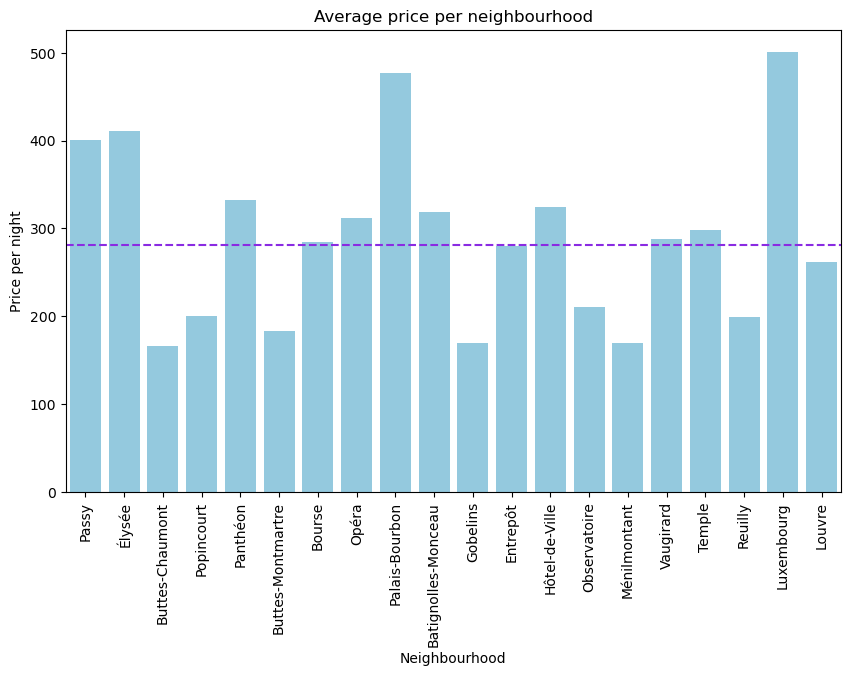

In [19]:
avg_price = airbnb_clean["price"].mean()
plt.figure(figsize=(10,6))
sns.barplot(data=airbnb_clean, x="neighbourhood", y="price",  errorbar=None,color="skyblue")
plt.title("Average price per neighbourhood")
plt.axhline(avg_price, color="blueviolet", linestyle="--", label=f"Avg price: {avg_price:.2f}")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood")
plt.ylabel("Price per night")
plt.show()

In [20]:
airbnb_clean["neighbourhood"].unique()

array(['Passy', 'Élysée', 'Buttes-Chaumont', 'Popincourt', 'Panthéon',
       'Buttes-Montmartre', 'Bourse', 'Opéra', 'Palais-Bourbon',
       'Batignolles-Monceau', 'Gobelins', 'Entrepôt', 'Hôtel-de-Ville',
       'Observatoire', 'Ménilmontant', 'Vaugirard', 'Temple', 'Reuilly',
       'Luxembourg', 'Louvre'], dtype=object)

In [21]:
# Creation of a new column to determine the arrondissement
def det_neighbourhood(row):
    if row == 'Observatoire' or row == 75114 or row == 75014:
        return "Paris 14ème"
    elif row == 'Élysée' or row == 75108 or row == 75008:
        return 'Paris 8ème'
    elif row == 'Passy' or row == 75116 or row == 75016:
        return 'Paris 16ème'
    elif row == 'Palais-Bourbon' or row == 75107 or row == 75007:
        return 'Paris 7ème'
    elif row == 'Luxembourg' or row == 75106 or row == 75006:
        return 'Paris 6ème'
    elif row == 'Buttes-Chaumont' or row == 75119 or row == 75019:
        return 'Paris 19ème'
    elif row == 'Popincourt' or row == 75111 or row == 75011:
        return 'Paris 11ème'
    elif row == 'Entrepôt' or row == 75110 or row == 75010:
        return 'Paris 10ème'
    elif row == 'Ménilmontant' or row == 75120 or row == 75020:
        return 'Paris 20ème'
    elif row == 'Panthéon' or row == 75105 or row == 75005:
        return 'Paris 5ème'
    elif row == 'Buttes-Montmartre' or row == 75118 or row == 75018:
        return 'Paris 18ème'
    elif row == 'Hôtel-de-Ville' or row == 75104 or row == 75004:
        return 'Paris 4ème'
    elif row == 'Bourse' or row == 75102 or row == 75002:
        return 'Paris 2ème'
    elif row == 'Batignolles-Monceau' or row == 75117 or row == 75017:
        return 'Paris 17ème'
    elif row == 'Vaugirard' or row == 75115 or row == 75015:
        return 'Paris 15ème'
    elif row == 'Reuilly'or row == 75112 or row == 75012:
        return 'Paris 12ème'
    elif row == 'Opéra'or row == 75109 or row == 75009:
        return 'Paris 9ème'
    elif row == 'Temple' or row == 75103 or row == 75003:
        return 'Paris 3ème'
    elif row ==  'Louvre' or row == 75101 or row == 75001:
        return 'Paris 1er'
    else: 
        return "Paris 13ème"
    

airbnb_clean["Commune nom"] = airbnb_clean["neighbourhood"].apply(det_neighbourhood)

In [22]:
# Second DF: Paris metro stations

In [23]:
metro = pd.read_csv("metro-france.csv", delimiter=';') 
metro= metro[(metro["Commune code Insee"] >= 75000) & (metro["Commune code Insee"] < 76000)]
metro.isnull().sum()

ID Line               0
Libelle Line          0
Libelle station       0
Longitude             0
Latitude              0
finish                0
Commune nom           0
Commune code Insee    0
dtype: int64

In [24]:
metro.duplicated().sum()

1

In [25]:
metro.drop_duplicates(inplace=True)

In [26]:
metro["Commune nom"].unique()

array(['Paris 17ème', 'Paris 8ème', 'Paris 1er', 'Paris 4ème',
       'Paris 12ème', 'Paris 16ème', 'Paris 18ème', 'Paris 9ème',
       'Paris 10ème', 'Paris 19ème', 'Paris 11ème', 'Paris 20ème',
       'Paris 2ème', 'Paris 3ème', 'Paris 6ème', 'Paris 15ème',
       'Paris 14ème', 'Paris 5ème', 'Paris 13ème', 'Paris 7ème'],
      dtype=object)

Text(0.5, 1.0, 'Stations in Paris')

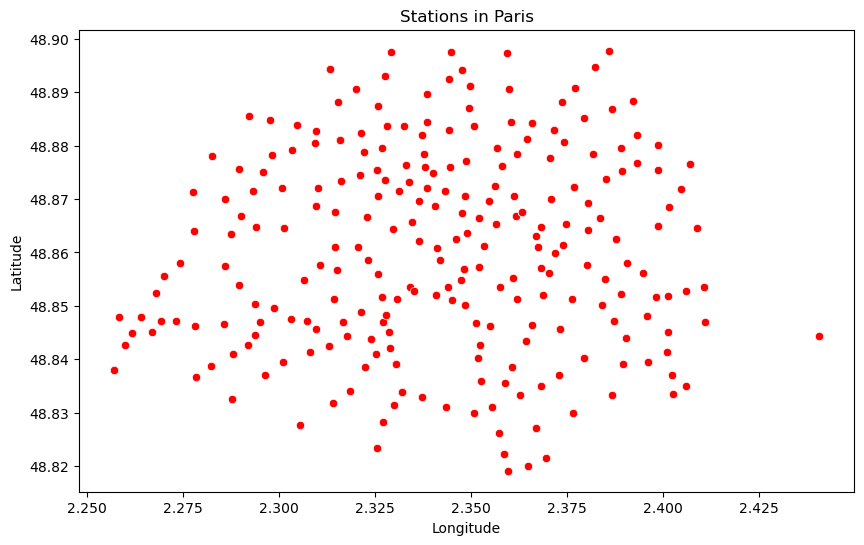

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=metro, x="Longitude", y= "Latitude", c="red")
plt.title("Stations in Paris")

In [28]:
metro.to_excel("metro.xlsx")

In [29]:
# Third DF: monuments of Paris

In [30]:
monuments = pd.read_csv("principaux-sites-touristiques-en-ile-de-france0.csv", delimiter=";")

In [31]:
monuments.isnull().sum()
monuments.dropna(inplace=True)

In [32]:
monuments.duplicated().sum()

0

In [33]:
monuments["Geo Point"] = monuments["Geo Point"].str.split(",")
monuments["latitude"] = monuments["Geo Point"].apply(lambda x: x[0])
monuments["longitude"] = monuments["Geo Point"].apply(lambda x:x[1])

In [34]:
monuments.columns

Index(['Geo Point', 'Geo Shape', 'dep', 'adresse', 'nomcom', 'insee',
       'nom_carto', 'typo_niv3', 'objectid', 'latitude', 'longitude'],
      dtype='object')

In [35]:
monuments = monuments.drop(columns=["Geo Point", "Geo Shape", "objectid"])

In [36]:
monuments["dep"].unique()

array([93, 75, 78, 95, 94, 77, 92, 91, 60], dtype=int64)

In [37]:
monuments_paris =  monuments[monuments["dep"] == 75]

In [38]:
monuments_paris.rename(columns={"nom_carto": "name", "typo_niv3":"category"}, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\2015388929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monuments_paris.rename(columns={"nom_carto": "name", "typo_niv3":"category"}, inplace=True)


In [39]:
monuments_paris["latitude"] = monuments_paris["latitude"].astype(float)
monuments_paris["longitude"] = monuments_paris["longitude"].astype(float)
monuments_paris["latitude"] = monuments_paris["latitude"].round(4)
monuments_paris["longitude"] = monuments_paris["longitude"].round(4)

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\3050293469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monuments_paris["latitude"] = monuments_paris["latitude"].astype(float)
C:\Users\crist\AppData\Local\Temp\ipykernel_37532\3050293469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monuments_paris["longitude"] = monuments_paris["longitude"].astype(float)
C:\Users\crist\AppData\Local\Temp\ipykernel_37532\3050293469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [40]:
monuments_paris["Commune nom"] = monuments_paris["insee"].apply(det_neighbourhood)

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\1297313215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monuments_paris["Commune nom"] = monuments_paris["insee"].apply(det_neighbourhood)


In [41]:
must_see = ['Tour Eiffel', 'Musée du Louvre', 'Arc de triomphe', "Escale des Champs-Elysées", "Place Vendôme" "Eglise de la Madeleine", "Basilique du sacré-coeur de Montmartre", "Panthéon", "Sainte-Chapelle", "Opéra national de Paris - palais Garnier","Musée d'Orsay", "Conciergerie", "Hôtel national des Invalides", "Centre Pompidou", "Place de la Concorde", "Musée du Luxembourg", "Escale Montebello Notre Dame"]
must_see_monuments = monuments_paris[monuments_paris['name'].isin(must_see)]
must_see_monuments.loc[must_see_monuments['name'] == 'Opéra national de Paris - palais Garnier', 'insee'] = 75109
must_see_monuments.loc[must_see_monuments['name'] == 'Opéra national de Paris - palais Garnier', 'nomcom'] = "Paris"

In [42]:
new_row = {"dep":"75", "adresse":"14 Place Vendôme", "nomcom":"Paris", "insee": 75101, "name":"Place Vendôme", "category":"Site et monument", "latitude": 48.86757, "longitude":2.32951, "Commune nom": "Paris 1er"}
new_row = pd.DataFrame.from_records([new_row])
must_see_monuments = pd.concat([must_see_monuments, new_row], ignore_index=True)
must_see_monuments

,dep,adresse,nomcom,insee,name,category,latitude,longitude,Commune nom
0,75,ENTRÉE PRINCIPALE PAR LA PYRAMIDE - (OU PAR LA...,Paris,75101,Musée du Louvre,Musée et écomusée,48.86100,2.33580,Paris 1er
1,75,6 BOULEVARD DU PALAIS,Paris,75101,Sainte-Chapelle,Site et monument,48.85540,2.34510,Paris 1er
2,75,2 BOULEVARD DU PALAIS - PALAIS DE LA CITÉ,Paris,75101,Conciergerie,Site et monument,48.85590,2.34600,Paris 1er
3,75,1 RUE DE LA LÉGION D'HONNEUR - ENTRÉE PAR LE P...,Paris,75107,Musée d'Orsay,Musée et écomusée,48.85990,2.32650,Paris 7ème
4,75,NOTRE DAME,Paris,75105,Escale Montebello Notre Dame,"Haltes, escales ou ports fluviaux de plaisance",48.85180,2.35030,Paris 5ème
5,75,19 RUE DE VAUGIRARD - JARDIN DU LUXEMBOURG,Paris,75106,Musée du Luxembourg,Musée et écomusée,48.84860,2.33400,Paris 6ème
6,75,PLACE CHARLES DE GAULLE,Paris,75108,Arc de triomphe,Site et monument,48.87370,2.29550,Paris 8ème
7,75,129 RUE DE GRENELLE - ESPLANADE DES INVALIDES,Paris,75107,Hôtel national des Invalides,Site et monument,48.85770,2.31290,Paris 7ème
8,75,8 rue Scribe,Paris,75109,Opéra national de Paris - palais Garnier,Diffusion du spectacle vivant,48.87160,2.33050,Paris 13ème
9,75,CHAMP DE MARS,Paris,75107,Tour Eiffel,Site et monument,48.85790,2.29510,Paris 7ème


In [43]:
must_see_monuments["name"] = must_see_monuments["name"].replace("Escale Montebello Notre Dame", "Cathédrale Notre-Dame de Paris")
must_see_monuments["latitude"] = must_see_monuments["latitude"].replace(48.8518, 48.8529)
must_see_monuments["longitude"] = must_see_monuments["longitude"].replace(2.3503, 2.3499)
must_see_monuments["name"] = must_see_monuments["name"].replace("Escale des Champs-Elysées", "Avenue des Champs-Élysées")
must_see_monuments["latitude"] = must_see_monuments["latitude"].replace(48.8643, 48.8705)
must_see_monuments["longitude"] = must_see_monuments["longitude"].replace(2.3153, 2.3048)

In [44]:
must_see_monuments.to_excel("monuments.xlsx")

In [45]:
# Merging DF1 and DF3 to get the distance between airbnbs and monuments 
airbnbs_monuments = pd.merge(airbnb_clean, must_see_monuments, on='Commune nom', suffixes=('_airbnb', '_monument'))

In [46]:
airbnbs_monuments["latitude_monument"] = airbnbs_monuments["latitude_monument"].astype("float")
airbnbs_monuments["longitude_monument"] = airbnbs_monuments["longitude_monument"].astype("float")


In [47]:
def haversine(lon1, lat1, lon2, lat2):
   
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  
    return c * r


airbnbs_monuments['monument_dist'] = haversine(
    airbnbs_monuments['longitude_airbnb'], 
    airbnbs_monuments['latitude_airbnb'], 
    airbnbs_monuments["longitude_monument"], 
    airbnbs_monuments["latitude_monument"])

airbnbs_monuments['near_monument'] = airbnbs_monuments['monument_dist'] < 0.50

airbnbs_monuments.head()


,id,listing_url,host_id,host_acceptance_rate,host_is_superhost,neighbourhood,latitude_airbnb,longitude_airbnb,room_type,accommodates,...,dep,adresse,nomcom,insee,name,category,latitude_monument,longitude_monument,monument_dist,near_monument
0,55239,https://www.airbnb.com/rooms/55239,260696,100,f,Élysée,48.87260,2.31477,Entire home/apt,4,...,75,PLACE CHARLES DE GAULLE,Paris,75108,Arc de triomphe,Site et monument,48.8737,2.2955,1.414630,False
1,55239,https://www.airbnb.com/rooms/55239,260696,100,f,Élysée,48.87260,2.31477,Entire home/apt,4,...,75,PORT DES CHAMPS ELYSÉES,Paris,75108,Avenue des Champs-Élysées,"Haltes, escales ou ports fluviaux de plaisance",48.8705,2.3048,0.765666,False
2,55239,https://www.airbnb.com/rooms/55239,260696,100,f,Élysée,48.87260,2.31477,Entire home/apt,4,...,75,PLACE DE LA CONCORDE,Paris,75108,Place de la Concorde,Site et monument,48.8655,2.3212,0.918951,False
3,513387,https://www.airbnb.com/rooms/513387,2528877,100,f,Panthéon,48.85176,2.34944,Entire home/apt,6,...,75,NOTRE DAME,Paris,75105,Cathédrale Notre-Dame de Paris,"Haltes, escales ou ports fluviaux de plaisance",48.8529,2.3499,0.131154,True
4,513387,https://www.airbnb.com/rooms/513387,2528877,100,f,Panthéon,48.85176,2.34944,Entire home/apt,6,...,75,PLACE DU PANTHÉON,Paris,75105,Panthéon,Site et monument,48.8463,2.3456,0.668991,False


In [48]:
airbnbs_monuments["near_monument"].value_counts()

near_monument
False    2151
True      565
Name: count, dtype: int64

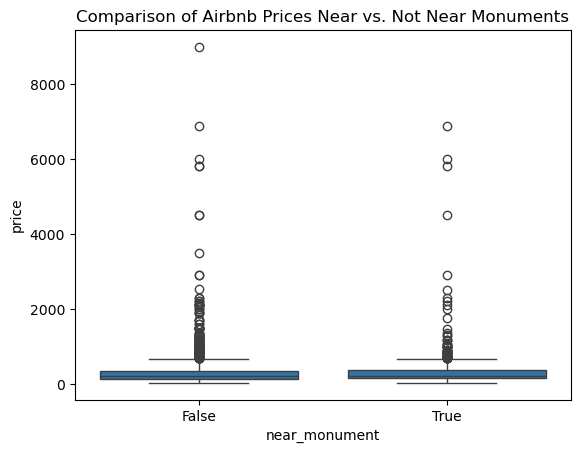

In [49]:
sns.boxplot(x="near_monument", y="price", data=airbnbs_monuments)
plt.title("Comparison of Airbnb Prices Near vs. Not Near Monuments")
plt.show()

In [50]:
Q1 = airbnbs_monuments['price'].quantile(0.25)  
Q3 = airbnbs_monuments['price'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

airbnbs_monuments_no_outliers = airbnbs_monuments[(airbnbs_monuments['price'] >= lower_bound) & (airbnbs_monuments['price'] <= upper_bound)]

In [51]:
#H0: Price of airbnbs near a monument <= price of airbnbs not near a monument
#H1: Price of airbnbs near a monument > price of airbnbs not near a monument

# Alpha: 0.05

airbnbs_monuments_near = airbnbs_monuments_no_outliers[airbnbs_monuments_no_outliers["near_monument"] ==True]["price"]
airbnbs_monuments_not_near = airbnbs_monuments_no_outliers[airbnbs_monuments_no_outliers["near_monument"] ==False]["price"]

stat, p = st.ttest_ind(airbnbs_monuments_near, airbnbs_monuments_not_near, alternative="greater", equal_var=False)

if p < 0.05:
    print("Reject H0: Airbnbs near monuments are significantly more expensive")
else:
    print("Fail to reject H0: No significant difference in price")
print(p)

Reject H0: Airbnbs near monuments are significantly more expensive
0.02682289600571864


In [52]:
# Merging airbnbs and metro to get the distance between airbnb and metro stations and it's impact on the price

airbnbs_metro = pd.merge(airbnb_clean, metro, on='Commune nom', suffixes=('_airbnb', '_metro'))

airbnbs_metro['metro_dist'] = haversine(
    airbnbs_metro['longitude'], 
    airbnbs_metro['latitude'], 
    airbnbs_metro["Longitude"], 
    airbnbs_metro["Latitude"])

airbnbs_metro['near_metro'] = airbnbs_metro['metro_dist'] < 0.1


In [53]:
#H0: Price of airbnbs near a metro station <= price of airbnbs not near a metro station
#H1: Price of airbnbs near a mentro station > price of airbnbs not near a metro station

# Alpha: 0.05

airbnbs_metro_near = airbnbs_metro[airbnbs_metro["near_metro"] ==True]["price"]
airbnbs_metro_not_near = airbnbs_metro[airbnbs_metro["near_metro"] ==False]["price"]

stat, p = st.ttest_ind(airbnbs_metro_near, airbnbs_metro_not_near, alternative="greater", equal_var=False)

if p < 0.05:
    print("Reject H0: Airbnbs near a metro station are more expensive")
else:
    print("Fail to reject H0: Insufficient evidence to claim Airbnbs near a metro station are more expensive.")

print(p)

Fail to reject H0: Insufficient evidence to claim Airbnbs near a metro station are more expensive.
0.2612568185123898


In [54]:
##### Weather DF to check the best season to go to Paris

In [55]:
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 48.8534,
	"longitude": 2.3488,
	"start_date": "2024-01-01",
	"end_date": "2024-12-31",
    "temperature_unit": "celsius",
    "precipitation_unit": "mm",
    "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration",
    "timezone": "Europe/Paris"}

response = requests.get(url, params=params)
data = response.json()

In [56]:
daily_data = data.get("daily", {})
weather = pd.DataFrame(daily_data)
weather

,time,temperature_2m_max,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration
0,2024-01-01,9.9,5.9,2.9,4.0,18562.91
1,2024-01-02,11.9,9.9,13.2,19.0,0.00
2,2024-01-03,12.0,8.6,2.1,4.0,16952.73
3,2024-01-04,10.6,6.7,1.3,3.0,13042.03
4,2024-01-05,9.3,3.9,0.0,0.0,25653.64
...,...,...,...,...,...,...
361,2024-12-27,5.6,-1.2,0.0,0.0,25099.32
362,2024-12-28,2.0,-0.8,0.0,0.0,0.00
363,2024-12-29,4.5,1.4,0.0,0.0,0.00
364,2024-12-30,4.1,2.6,0.1,1.0,0.00


In [57]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 366 non-null    object 
 1   temperature_2m_max   366 non-null    float64
 2   temperature_2m_min   366 non-null    float64
 3   precipitation_sum    366 non-null    float64
 4   precipitation_hours  366 non-null    float64
 5   sunshine_duration    366 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.3+ KB


In [58]:
weather["time"] = pd.to_datetime(weather["time"])

In [59]:
weather["sunshine_duration"].median()

25309.305

In [60]:
weather["hours_sun"] = pd.cut(weather["sunshine_duration"], bins=[0, 14000, 26000, weather["sunshine_duration"].max()], labels=["low (0-4h)", "moderate (0-7h)", "high (+7h)"], include_lowest=True)

In [61]:
weather["hours_sun"].value_counts()

hours_sun
high (+7h)         176
low (0-4h)         117
moderate (0-7h)     73
Name: count, dtype: int64

<Axes: ylabel='count'>

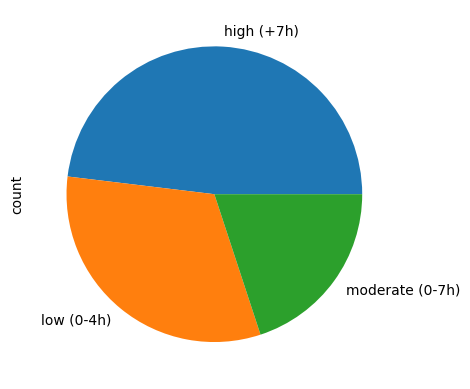

In [62]:
weather["hours_sun"].value_counts().plot.pie()

In [63]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or month in [1, 2] or (month == 3 and day <= 20):
        return "Winter"
    elif (month == 3 and day >= 21) or month in [4, 5] or (month == 6 and day <= 20):
        return "Spring"
    elif (month == 6 and day >= 21) or month in [7, 8] or (month == 9 and day <= 22):
        return "Summer"
    else:
        return "Autumn"

weather["year_season"] = weather["time"].apply(get_season)

In [64]:
weather["year_season"].value_counts()

year_season
Summer    94
Spring    92
Winter    91
Autumn    89
Name: count, dtype: int64

In [65]:
sunhours_season = weather.groupby("year_season")["hours_sun"].value_counts().reset_index()
sunhours_season

,year_season,hours_sun,count
0,Autumn,low (0-4h),48
1,Autumn,moderate (0-7h),26
2,Autumn,high (+7h),15
3,Spring,high (+7h),70
4,Spring,low (0-4h),14
5,Spring,moderate (0-7h),8
6,Summer,high (+7h),74
7,Summer,moderate (0-7h),12
8,Summer,low (0-4h),8
9,Winter,low (0-4h),47


In [66]:
fig = px.bar(sunhours_season, 
             x="year_season", 
             y="count", 
             color="hours_sun", 
             barmode="group",
             text="count",
             color_discrete_map={"low (0-4h)": "#9CF0A5", "moderate (0-7h)": "#9d83f7", "high (+7h)": "#f0bd57"}, 
             labels={"year_season": "Season", "count": "Number of Days", "hours_sun": "Amount of sun hours"},
             title="Distribution of sunlight hours per season",
             width=800,
             height=500)
fig.update_traces(textposition="inside")
fig.update_layout(title_x=0.5)
fig.update_layout(
    plot_bgcolor="white",   yaxis=dict(
        showgrid=True, gridcolor="lightgray"),)

fig.show()

In [67]:
temperature_mean = weather.groupby("year_season")[["temperature_2m_max", "temperature_2m_min"]].mean().reset_index()
temperature_mean

,year_season,temperature_2m_max,temperature_2m_min
0,Autumn,13.347191,7.446067
1,Spring,17.188043,8.954348
2,Summer,24.003191,14.535106
3,Winter,9.843956,4.091209


In [68]:
fig = px.bar(
    temperature_mean, 
    x="year_season", 
    y=["temperature_2m_max", "temperature_2m_min"], 
    barmode="group",
    labels={"year_season": "Season", "value": "Temperature (°C)","variable": "Min/Max"},
    title="Average temperatures per season",
    color_discrete_map={"temperature_2m_max":"#fa2a49", "temperature_2m_min": "#70c7e5"},
    width=800,
    height=500)
fig.update_traces(
    texttemplate='%{y:.1f}',
    textposition="inside")
fig.for_each_trace(lambda trace: trace.update(name="Max temperature") if trace.name == "temperature_2m_max" else trace.update(name="Min temperature"))
fig.update_layout(title_x=0.5)
fig.update_layout(
    plot_bgcolor="white",   yaxis=dict(
        showgrid=True, gridcolor="lightgray"))

fig.show()

In [69]:
days_rain = weather[weather["precipitation_sum"] != 0]
frequency_table = days_rain["year_season"].value_counts()

In [70]:
days_rain.shape

(244, 8)

In [71]:
days_rain_more_five = weather[weather["precipitation_sum"] > 5]
frequency_table_2 = days_rain_more_five["year_season"].value_counts()

In [72]:
days_rain_more_five.shape

(70, 8)

In [73]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=frequency_table.index, 
    y=frequency_table.values, 
    text=frequency_table.values, 
    textposition="outside",
    name="Rainy days",
    marker_color="LightSkyBlue"
))

fig.add_trace(go.Bar(
    x=frequency_table_2.index, 
    y=frequency_table_2.values, 
    text=frequency_table_2.values, 
    textposition="outside",
    name="Days with >5h rain",
    marker_color="MediumPurple"
))

fig.update_layout(
    title="Rainy days in Paris",
    xaxis_title="Season",
    yaxis_title="Amount of days",
    barmode="overlay",
    plot_bgcolor="white",
    paper_bgcolor="white",
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    title_x=0.5,
    width=750,height=500 
)

fig.show()


In [74]:
### Nightclubs in Paris 

In [75]:
nightclubs = pd.read_csv("nightclubs.csv")

In [76]:
nightclubs = nightclubs.dropna(subset="addr:postcode")
nightclubs["addr:postcode"] = nightclubs["addr:postcode"].astype(int)
nightclubs["Commune nom"] = nightclubs["addr:postcode"].apply(det_neighbourhood)

In [77]:
nightclubs = nightclubs.drop(columns=['@id', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:street', 'alcohol', 'alt_name', 'amenity',
        'building:levels', 'check_date',
       'check_date:opening_hours', 'concert', 'contact:city',
       'contact:email', 'contact:facebook', 'contact:housenumber',
       'contact:instagram', 'contact:mastodon', 'contact:phone',
       'contact:postcode', 'contact:ra', 'contact:street', 'contact:twitter',
       'contact:website', 'email', 'entrance', 'facebook',
       'image', 'level', 'lgbtq', 'lgbtq:men', 'musical_instrument:piano', 'note',
       'old_name', 'opening_hours:covid19',
       'opening_hours:signed', 'operator', 'phone', 'room', "music", "description", "live_music", "wheelchair", "opening_hours",
       'smoking', 'source', 'survey:date', 'toilets:wheelchair', 'website', 'wikidata', 'wikipedia', '@geometry', "name:fr", "restaurant", "bar", "area", "building", "club", "min_age"])

In [78]:
nightclubs = nightclubs.rename(columns={"X":"longitude", "Y":"latitude"})
nightlife_neighbourhoods = nightclubs.groupby("Commune nom")["id"].count().sort_values(ascending=False)[:3]

In [79]:
nightlife_neighbourhoods

Commune nom
Paris 6ème     4
Paris 11ème    3
Paris 19ème    3
Name: id, dtype: int64

In [80]:
#### Cultural

In [81]:
museums = monuments_paris[monuments_paris["category"] == "Musée et écomusée"]
cultural_neighbourhoods = museums.groupby("Commune nom")["nomcom"].count().sort_values(ascending=False)[:4]

In [82]:
cultural_neighbourhoods

Commune nom
Paris 16ème    18
Paris 7ème     12
Paris 6ème     11
Paris 5ème     10
Name: nomcom, dtype: int64

In [83]:
#### Luxury

In [84]:
luxury = pd.read_csv("luxury.csv", delimiter=";")
luxury = luxury.rename(columns={"@lon.1":"longitude", "@lat":"latitude"})
luxury = luxury.drop(columns=["lat", "@lon"])
luxury["Commune nom"] = luxury["postal_code"].apply(det_neighbourhood)

In [85]:
luxury.groupby("Commune nom").count()

,@id,name,shop,brand,latitude,longitude,postal_code
Commune nom,,,,,,,
Paris 12ème,3,3,3,3,3,3,3
Paris 15ème,2,2,2,2,2,2,2
Paris 7ème,1,1,1,1,1,1,1
Paris 8ème,36,36,36,36,36,36,36


In [86]:
#Bohemian

In [87]:
boho = pd.read_csv("boho.csv")

In [88]:
boho = boho[["@id", "addr:postcode", "name"]]
boho = boho.dropna(subset="addr:postcode")
boho["Commune nom"] = boho["addr:postcode"].apply(det_neighbourhood)
bohemian_neightbourhoods = boho.groupby("Commune nom")["@id"].count().sort_values(ascending=False)[:3]
bohemian_neightbourhoods

Commune nom
Paris 18ème    7
Paris 19ème    6
Paris 4ème     5
Name: @id, dtype: int64

In [89]:
def det_experience(row):
    if row == "Paris 6ème" or row == "Paris 11ème" or row == "Paris 19ème":
        return "Nightlife"
    if row == "Paris 16ème" or row == "Paris 7ème" or row == "Paris 6ème" or row == "Paris 5ème":
        return "Cultural"
    if row == "Paris 18ème" or row == "Paris 19ème" or row == "Paris 4ème":
        return "Bohemian"
    if row == "Paris 8ème":
        return "Luxury"

In [90]:
airbnb_clean["experience"] = airbnb_clean["Commune nom"].apply(det_experience)

In [91]:
airbnb_clean["airbnb_monument"] = "airbnb"
must_see_monuments["airbnb_monument"] = "monument"
final_df = pd.concat([airbnb_clean, must_see_monuments])
final_df["name"].fillna("airbnb", inplace = True)
final_df["price_range"].fillna("Monument", inplace=True)
final_df.loc[final_df['airbnb_monument'] == 'monument', 'experience'] = final_df.loc[final_df['airbnb_monument'] == 'monument', 'experience'].fillna('Monument') 
final_df.to_csv("airbnb_monument_fortableau.csv", index = False)
final_df.to_excel("airbnb_monument_fortableau.xlsx", index = False)

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\4266109968.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\crist\AppData\Local\Temp\ipykernel_37532\4266109968.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [92]:
final_df

,id,listing_url,host_id,host_acceptance_rate,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,...,price_range,Commune nom,experience,airbnb_monument,dep,adresse,nomcom,insee,name,category
91,139074.0,https://www.airbnb.com/rooms/139074,4450132.0,100.0,f,Passy,48.87173,2.29071,Entire home/apt,2.0,...,Fair,Paris 16ème,Cultural,airbnb,NaN,NaN,NaN,NaN,airbnb,NaN
164,55239.0,https://www.airbnb.com/rooms/55239,260696.0,100.0,f,Élysée,48.87260,2.31477,Entire home/apt,4.0,...,Luxury,Paris 8ème,Luxury,airbnb,NaN,NaN,NaN,NaN,airbnb,NaN
245,310103.0,https://www.airbnb.com/rooms/310103,1317183.0,100.0,f,Buttes-Chaumont,48.87373,2.37575,Entire home/apt,6.0,...,Premium,Paris 19ème,Nightlife,airbnb,NaN,NaN,NaN,NaN,airbnb,NaN
251,314903.0,https://www.airbnb.com/rooms/314903,1617534.0,100.0,f,Popincourt,48.85294,2.37536,Entire home/apt,3.0,...,Fair,Paris 11ème,Nightlife,airbnb,NaN,NaN,NaN,NaN,airbnb,NaN
352,513387.0,https://www.airbnb.com/rooms/513387,2528877.0,100.0,f,Panthéon,48.85176,2.34944,Entire home/apt,6.0,...,Luxury,Paris 5ème,Cultural,airbnb,NaN,NaN,NaN,NaN,airbnb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,NaN,NaN,NaN,NaN,NaN,NaN,48.86050,2.35240,NaN,NaN,...,Monument,Paris 4ème,Monument,monument,75,PLACE GEORGES POMPIDOU,Paris,75104.0,Centre Pompidou,Site et monument
12,NaN,NaN,NaN,NaN,NaN,NaN,48.84630,2.34560,NaN,NaN,...,Monument,Paris 5ème,Monument,monument,75,PLACE DU PANTHÉON,Paris,75105.0,Panthéon,Site et monument
13,NaN,NaN,NaN,NaN,NaN,NaN,48.86550,2.32120,NaN,NaN,...,Monument,Paris 8ème,Monument,monument,75,PLACE DE LA CONCORDE,Paris,75108.0,Place de la Concorde,Site et monument
14,NaN,NaN,NaN,NaN,NaN,NaN,48.88720,2.34340,NaN,NaN,...,Monument,Paris 18ème,Monument,monument,75,35 RUE DU CHEVALIER-DE-LA-BARRE - PARVIS DU SA...,Paris,75118.0,Basilique du sacré-coeur de Montmartre,Site et monument


In [93]:
# taking a look at Paris' population
popu = pd.read_csv("base-comparateur-de-territoires.csv", delimiter=";")

In [94]:
popu.columns

Index(['CODGEO', 'NOM_COMMUNE', 'P20_POP', 'P14_POP', 'SUPERF', 'NAIS1420',
       'DECE1420', 'P20_MEN', 'NAISD22', 'DECESD22', 'P20_LOG', 'P20_RP',
       'P20_RSECOCC', 'P20_LOGVAC', 'P20_RP_PROP', 'NBMENFISC20', 'PIMP20',
       'MED20', 'TP6020', 'P20_EMPLT', 'P20_EMPLT_SAL', 'P14_EMPLT',
       'P20_POP1564', 'P20_CHOM1564', 'P20_ACT1564', 'ETTOT21', 'ETAZ21',
       'ETBE21', 'ETFZ21', 'ETGU21', 'ETGZ21', 'ETOQ21', 'ETTEF121',
       'ETTEFP1021', 'IDF', 'Geo Point', 'Geo Shape'],
      dtype='object')

In [95]:
paris = popu["NOM_COMMUNE"].str.contains("Arrondissement", case=False, na=False)

In [96]:
paris_pop = popu[paris]

In [97]:
paris_pop.columns

Index(['CODGEO', 'NOM_COMMUNE', 'P20_POP', 'P14_POP', 'SUPERF', 'NAIS1420',
       'DECE1420', 'P20_MEN', 'NAISD22', 'DECESD22', 'P20_LOG', 'P20_RP',
       'P20_RSECOCC', 'P20_LOGVAC', 'P20_RP_PROP', 'NBMENFISC20', 'PIMP20',
       'MED20', 'TP6020', 'P20_EMPLT', 'P20_EMPLT_SAL', 'P14_EMPLT',
       'P20_POP1564', 'P20_CHOM1564', 'P20_ACT1564', 'ETTOT21', 'ETAZ21',
       'ETBE21', 'ETFZ21', 'ETGU21', 'ETGZ21', 'ETOQ21', 'ETTEF121',
       'ETTEFP1021', 'IDF', 'Geo Point', 'Geo Shape'],
      dtype='object')

In [98]:
paris_pop["arrondissement_number"] = paris_pop["NOM_COMMUNE"].str.extract(r'(\d+)').astype(int)
paris_pop = paris_pop.sort_values(by="arrondissement_number")

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\3475751079.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
fig = px.bar(paris_pop, x='NOM_COMMUNE', y='P20_POP', title="Population by district", labels={
                     "NOM_COMMUNE": "District",
                     "P20_POP": "Population"},
                     height=600,
                     width=1000,
                     color_discrete_sequence=["#F4A460"])
fig.update_layout(
    plot_bgcolor="white",   yaxis=dict(
        showgrid=True, gridcolor="lightgray"),
    )

fig.show()

In [100]:
paris_pop["TP6020"] = paris_pop["TP6020"].str.replace(r'\,0', '', regex=True)
paris_pop["TP6020"] = pd.to_numeric(paris_pop['TP6020'])

In [101]:
fig = px.bar(paris_pop, x='NOM_COMMUNE', y='TP6020')
fig.show()

In [102]:
fig = px.bar(paris_pop, x="NOM_COMMUNE", y=["P20_ACT1564", "P20_CHOM1564"], title="Status of population(15-64yo)")
fig.show()

In [103]:
fig = px.bar(paris_pop, x="NOM_COMMUNE", y=["P20_RSECOCC", "P20_RP_PROP"], title="PR/SC")
fig.show()

In [104]:
paris_pop["Geo Point"] = paris_pop["Geo Point"].str.split(",")
paris_pop["latitude"] = paris_pop["Geo Point"].apply(lambda x: x[0])
paris_pop["longitude"] = paris_pop["Geo Point"].apply(lambda x:x[1])
paris_pop["latitude"] = pd.to_numeric(paris_pop["latitude"], errors="coerce")
paris_pop["longitude"] = pd.to_numeric(paris_pop["longitude"], errors="coerce")

In [105]:
fig = px.scatter_mapbox(
    paris_pop, 
    lat="latitude",
    lon="longitude", 
    size="P20_POP",  
    hover_name="NOM_COMMUNE",
    hover_data={"P20_POP": True},
    color="P20_POP",
    zoom=11,  
    mapbox_style="carto-positron",height=500,
                     width=800,labels={"P20_POP": "Population"})

fig.show()

In [106]:
paris_pop["TP6020"]

1144    12
277     14
143     13
1284    14
776     11
400     11
1145     9
531     10
1146    11
401     17
278     15
532     13
144     17
1147    13
533     12
1015    11
1285    14
1286    21
1148    22
145     20
Name: TP6020, dtype: int64

In [107]:
# Crminality in Paris
crimenes = pd.read_csv("donnee-dep-data.gouv-2024-geographie2024-produit-le2025-01-26.csv", delimiter=";")
crimes_paris = crimenes[crimenes["Code_departement"] == "75"]

In [108]:
crimes_paris.columns

Index(['Code_departement', 'Code_region', 'annee', 'indicateur',
       'unite_de_compte', 'nombre', 'taux_pour_mille', 'insee_pop',
       'insee_pop_millesime', 'insee_log', 'insee_log_millesime'],
      dtype='object')

In [109]:
crimes_paris[crimes_paris["annee"]==2024]

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
883,75,11,2024,Homicides,Victime,34,"0,0160855",2113705,2022,1396753,2021
1792,75,11,2024,Tentatives d'homicides,Victime,187,"0,0884702",2113705,2022,1396753,2021
2701,75,11,2024,Coups et blessures volontaires,Victime,12729,"6,0221270",2113705,2022,1396753,2021
3610,75,11,2024,Coups et blessures volontaires intrafamiliaux,Victime,5307,"2,5107572",2113705,2022,1396753,2021
4519,75,11,2024,Autres coups et blessures volontaires,Victime,7422,"3,5113698",2113705,2022,1396753,2021
5428,75,11,2024,Violences sexuelles,Victime,5877,"2,7804258",2113705,2022,1396753,2021
6337,75,11,2024,Vols avec armes,Infraction,369,"0,1745750",2113705,2022,1396753,2021
7246,75,11,2024,Vols violents sans arme,Infraction,7433,"3,5165740",2113705,2022,1396753,2021
8155,75,11,2024,Vols sans violence contre des personnes,Victime entendue,99076,"46,8731445",2113705,2022,1396753,2021
9064,75,11,2024,Cambriolages de logement,Infraction,9249,"6,6217857",2113705,2022,1396753,2021


In [110]:
crimes_paris["indicateur"].unique()

array(['Homicides', "Tentatives d'homicides",
       'Coups et blessures volontaires',
       'Coups et blessures volontaires intrafamiliaux',
       'Autres coups et blessures volontaires', 'Violences sexuelles',
       'Vols avec armes', 'Vols violents sans arme',
       'Vols sans violence contre des personnes',
       'Cambriolages de logement', 'Vols de véhicules',
       'Vols dans les véhicules', "Vols d'accessoires sur véhicules",
       'Destructions et dégradations volontaires', 'Escroqueries',
       'Trafic de stupéfiants', 'Usage de stupéfiants'], dtype=object)

In [111]:
vols_paris_mask = crimes_paris["indicateur"].str.contains("vols", case=False, na=False)
vols_paris = crimes_paris[vols_paris_mask]
non_vols_paris = crimes_paris[~vols_paris_mask]

In [112]:
mapping_dict = {
    'Homicides': 'Homicides',
    "Tentatives d'homicides": "Attempted Homicides",
    'Coups et blessures volontaires': 'Assault and Battery',
    'Coups et blessures volontaires intrafamiliaux': 'Domestic Assault and Battery',
    'Autres coups et blessures volontaires': 'Other Assault and Battery',
    'Violences sexuelles': 'Sexual Violence',
    'Vols avec armes': 'Robberies with Weapons',
    'Vols violents sans arme': 'Violent Thefts without Weapons',
    'Vols sans violence contre des personnes': 'Non-Violent Thefts Against Individuals',
    'Cambriolages de logement': 'Home Burglaries',
    'Vols de véhicules': 'Vehicle Thefts',
    'Vols dans les véhicules': 'Thefts from Vehicles',
    "Vols d'accessoires sur véhicules": 'Thefts of Vehicle Accessories',
    'Destructions et dégradations volontaires': 'Intentional Destruction and Degradation',
    'Escroqueries': 'Fraud',
    'Trafic de stupéfiants': 'Drug Trafficking',
    'Usage de stupéfiants': 'Drug Use'
}

vols_paris['indicateur'] = vols_paris['indicateur'].replace(mapping_dict)
non_vols_paris['indicateur'] = non_vols_paris['indicateur'].replace(mapping_dict)

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\132618187.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\crist\AppData\Local\Temp\ipykernel_37532\132618187.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\crist\AppData\Local\Temp\ipykernel_37532\1344166851.py:4: UserWarning:

The palette list has more values (12) than needed (11), which may not be intended.



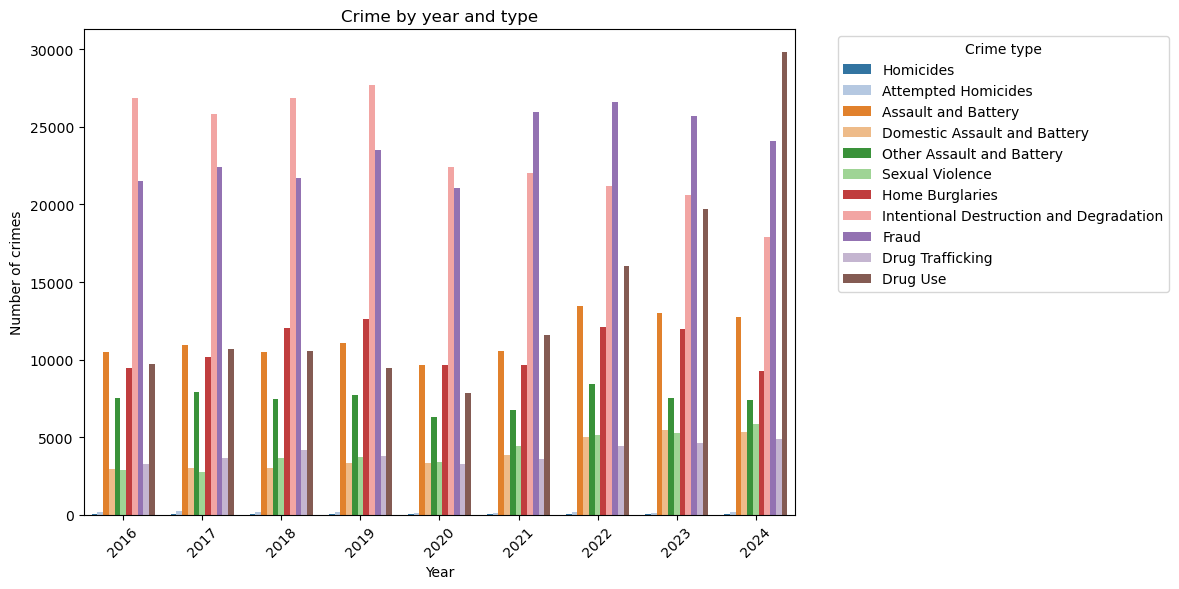

In [114]:
palette = sns.color_palette("tab20", 12)

plt.figure(figsize=(12, 6))
sns.barplot(data=non_vols_paris, x="annee", y="nombre", hue="indicateur", palette=palette)

plt.xlabel("Year")
plt.ylabel("Number of crimes")
plt.title("Crime by year and type")
plt.legend(title="Crime type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)  
plt.tight_layout() 

plt.show()

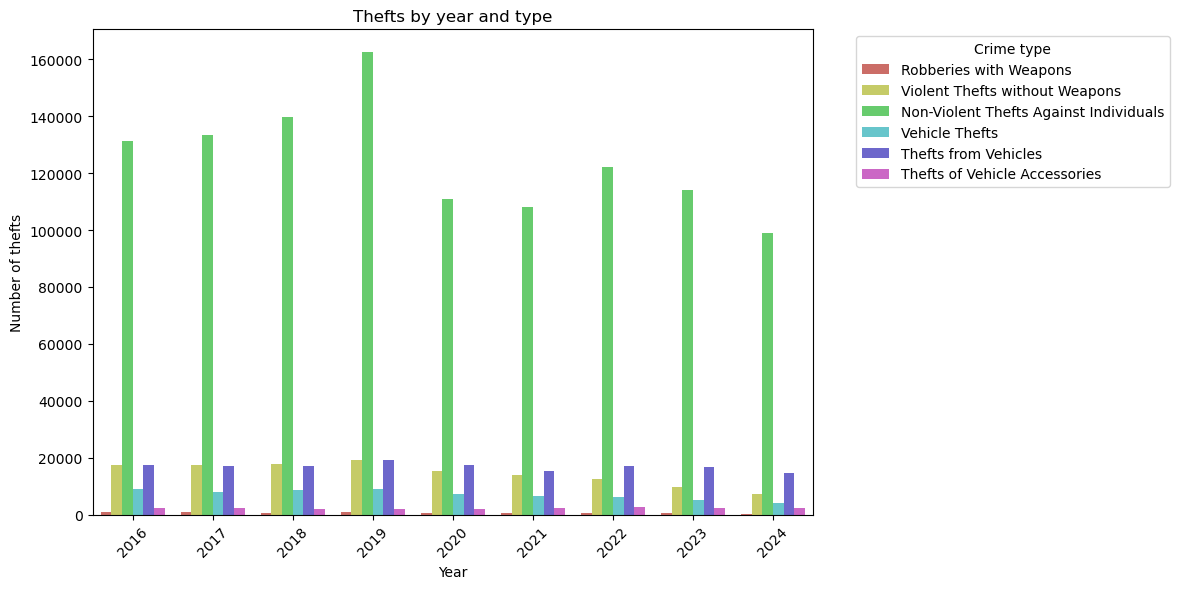

In [115]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vols_paris, x="annee", y="nombre", hue="indicateur", palette="hls")

plt.xlabel("Year")
plt.ylabel("Number of thefts")
plt.title("Thefts by year and type")
plt.legend(title="Crime type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)  
plt.tight_layout() 

plt.show()


In [116]:
crime_trends = crimes_paris.groupby("annee")["nombre"].sum().reset_index()
crime_trends

,annee,nombre
0,2016,273078
1,2017,276499
2,2018,286397
3,2019,315870
4,2020,240541
5,2021,245183
6,2022,273444
7,2023,262658
8,2024,245421


In [117]:
fig = px.line(crime_trends, x="annee", y="nombre", 
              markers=True, title="Total crimes over the years", width=700,height=500 )

fig.update_layout(xaxis_title="Year", yaxis_title="Total crimes",
                   template="plotly_white",hovermode="x unified")

fig.update_traces(line=dict(color="#bb8fce", width=3))  

fig.update_layout(title={'xanchor': 'center', 'y':0.9,
        'x':0.5,
        'yanchor': 'top'})

fig.show()


In [ ]:
## Getting weather data of London

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 51.50853,
	"longitude": -0.12574,
	"start_date": "2024-01-01",
	"end_date": "2024-12-31",
    "temperature_unit": "celsius",
    "precipitation_unit": "mm",
    "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration",
    "timezone": "Europe/Paris"}

response = requests.get(url, params=params)
data = response.json()
daily_data = data.get("daily", {})
weather_london = pd.DataFrame(daily_data)
weather_london["time"] = pd.to_datetime(weather_london["time"])
weather_london["year_season"] = weather_london["time"].apply(get_season)
days_rain = weather_london[weather_london["precipitation_sum"] != 0]

frequency_table = days_rain["year_season"].value_counts()

In [ ]:
days_rain.shape

(240, 7)

In [ ]:
days_rain_more_five = weather_london[weather_london["precipitation_sum"] > 5]
frequency_table_2 = days_rain_more_five["year_season"].value_counts()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=frequency_table.index, 
    y=frequency_table.values, 
    text=frequency_table.values, 
    textposition="outside",
    name="Rainy days",
    marker_color="LightSkyBlue"
))

fig.add_trace(go.Bar(
    x=frequency_table_2.index, 
    y=frequency_table_2.values, 
    text=frequency_table_2.values, 
    textposition="outside",
    name="Days with >5h rain",
    marker_color="MediumPurple"
))

fig.update_layout(
    title="Rainy days in London",
    xaxis_title="Season",
    yaxis_title="Amount of days",
    barmode="overlay",
    plot_bgcolor="white",
    paper_bgcolor="white",
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    title_x=0.5,
    width=750,height=500 
)

fig.show()
